In [1]:
from lib.abstract_torch import get_device
from lib.dataloader import get_task_loaders
from lib.models import ANN
from lib.train import train
from lib.test import test
from lib.visualize import vizualize_loss_hists, visualize_accs_matrix, visualize_avg_acc_curve

import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/home/mathis/miniconda3/envs/.jax_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_vanilla = True

In [3]:
device = get_device()

In [4]:
path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

In [5]:
# Number of tasks
num_tasks = 10
train_percentage = 0.8

# Data parameter
batch_size=128

# Network Architecture
num_inputs = 28*28
num_hidden_root = 50
num_outputs = 10

# Train parameters
loss_name = "CE"
optimizer_name = "Adam"

# Hyperparameters
num_epochs = 3
lr = 1e-3

## Reproducibility

In [6]:
random_seed = 88
permutation_random_seeds = list(range(num_tasks))

## Get p-MNIST loaders

In [7]:
train_loaders_list, val_loaders_list, test_loaders_list = [], [], []
for random_seed in permutation_random_seeds :
    train_loader, val_loader, test_loader = get_task_loaders(data_path, batch_size, random_seed, train_percentage=train_percentage, difficulty="easy", download=True)
    train_loaders_list += [train_loader]
    val_loaders_list += [val_loader]
    test_loaders_list += [test_loader]

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 10546423.83it/s]


Extracting /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw/train-images-idx3-ubyte.gz to /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 306986.62it/s]


Extracting /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2658081.22it/s]


Extracting /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 10980131.85it/s]


Extracting /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/mathis/EIdeaS/GroHess/Mathis/Naive baseline/data/MNIST/raw



## Grow from root model

In [8]:
# Define root model
root_model = ANN(num_inputs, num_hidden_root, num_outputs, random_seed)

In [9]:
# Initialize the matrix containing test accuracies on various task
test_accs_matrix = np.zeros((num_tasks,num_tasks))

# Keep track of loss and when growth occurs
loss_hist_list = []
growth_indices_list = []

# Train & grow the root model on the other tasks
for i in range(num_tasks) :
    # Verbose
    print("==============================================")
    print("TASK :", i)

    # Train on new task
    train_loader = train_loaders_list[i]
    loss_hist = train(root_model,
                      loss_name, optimizer_name, lr, num_epochs, batch_size,
                      train_loader,
                      device, random_seed, verbose=2)
    

    loss_hist_list.append(loss_hist)

    # Test on each task
    for j in range(num_tasks) :
        test_accs_matrix[i,j] = round(test(root_model, test_loaders_list[j], batch_size, device),2)

TASK : 0
Number of frozen neurons : 0.0
Number of trainable neurons : 50


100%|██████████| 3/3 [00:20<00:00,  6.91s/it]


TASK : 1
Number of frozen neurons : 50
Number of trainable neurons : 50


100%|██████████| 3/3 [00:20<00:00,  6.84s/it]


TASK : 2
Number of frozen neurons : 100
Number of trainable neurons : 50


100%|██████████| 3/3 [00:20<00:00,  6.71s/it]


TASK : 3
Number of frozen neurons : 150
Number of trainable neurons : 50


100%|██████████| 3/3 [00:20<00:00,  6.76s/it]


TASK : 4
Number of frozen neurons : 200
Number of trainable neurons : 50


100%|██████████| 3/3 [00:20<00:00,  6.89s/it]


TASK : 5
Number of frozen neurons : 250
Number of trainable neurons : 50


100%|██████████| 3/3 [00:19<00:00,  6.65s/it]


TASK : 6
Number of frozen neurons : 300
Number of trainable neurons : 50


100%|██████████| 3/3 [00:19<00:00,  6.42s/it]


TASK : 7
Number of frozen neurons : 350
Number of trainable neurons : 50


100%|██████████| 3/3 [00:19<00:00,  6.54s/it]


TASK : 8
Number of frozen neurons : 400
Number of trainable neurons : 50


100%|██████████| 3/3 [00:19<00:00,  6.57s/it]


TASK : 9
Number of frozen neurons : 450
Number of trainable neurons : 50


100%|██████████| 3/3 [00:19<00:00,  6.58s/it]


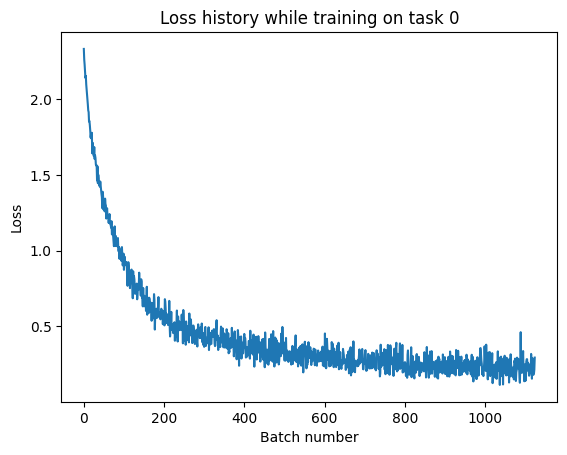

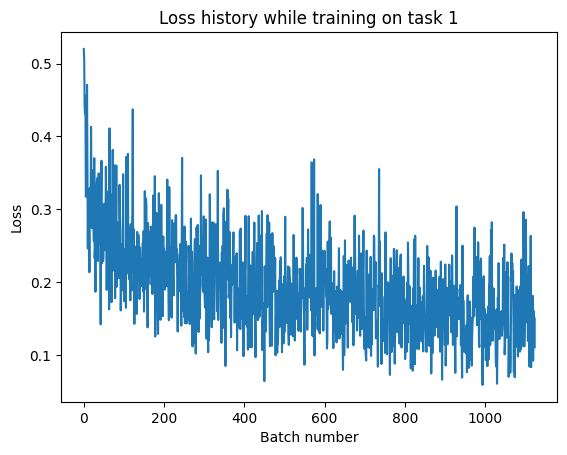

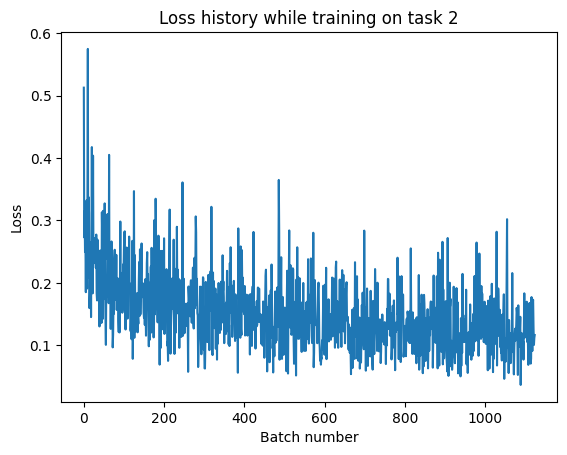

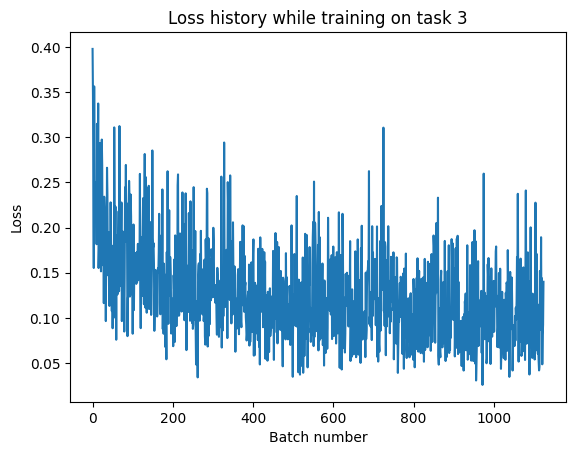

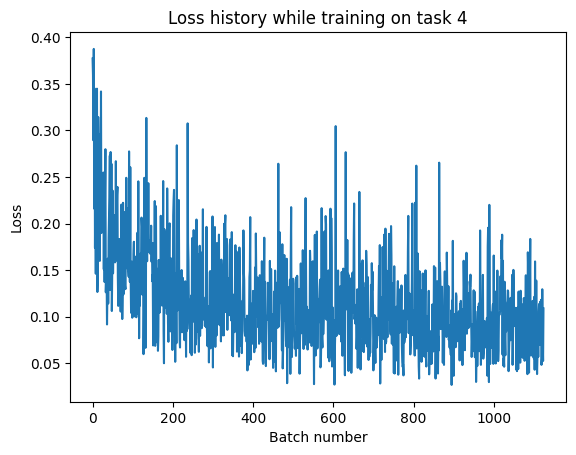

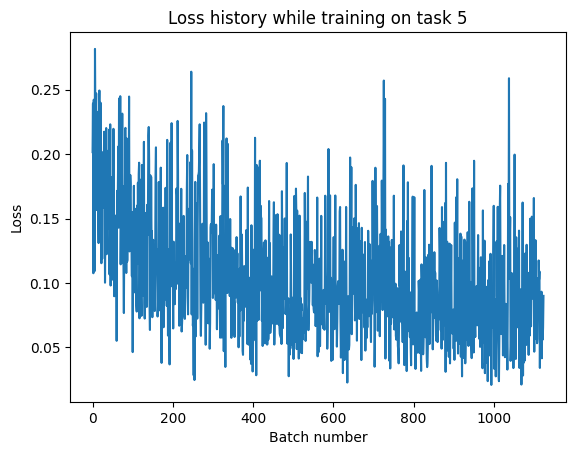

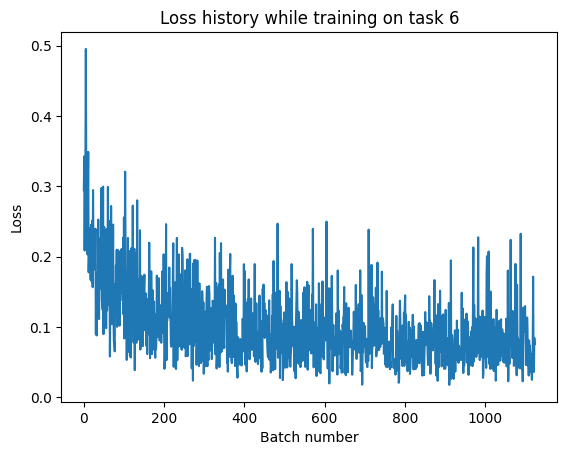

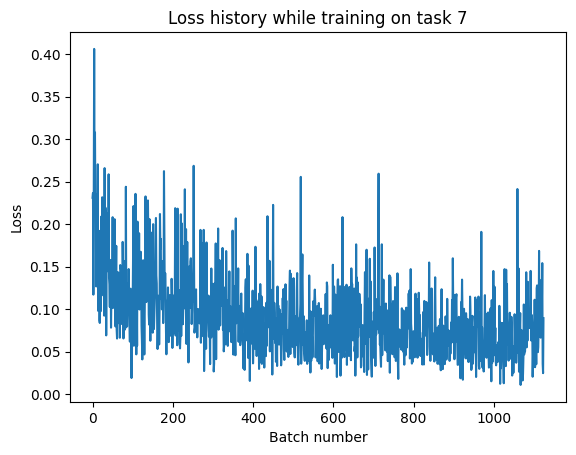

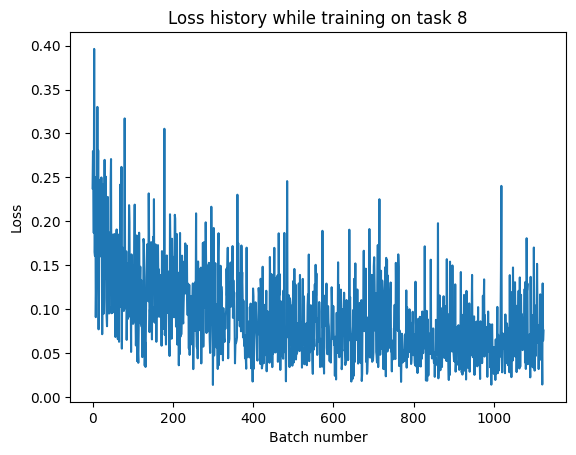

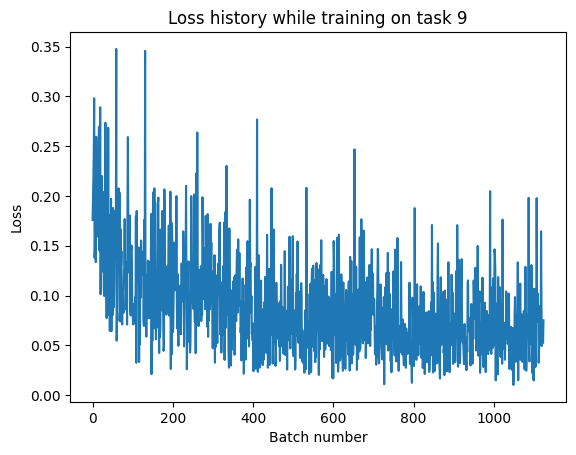

In [10]:
vizualize_loss_hists(loss_hist_list)

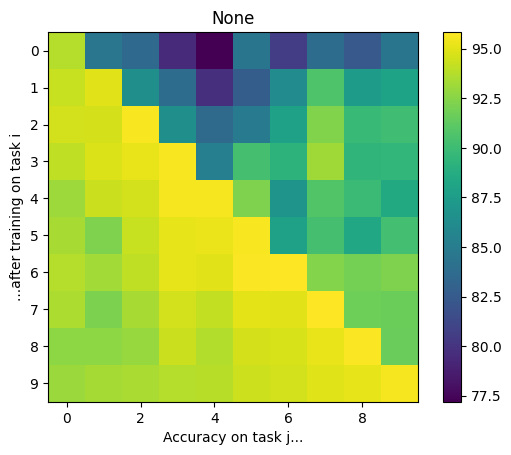

In [11]:
visualize_accs_matrix(test_accs_matrix)

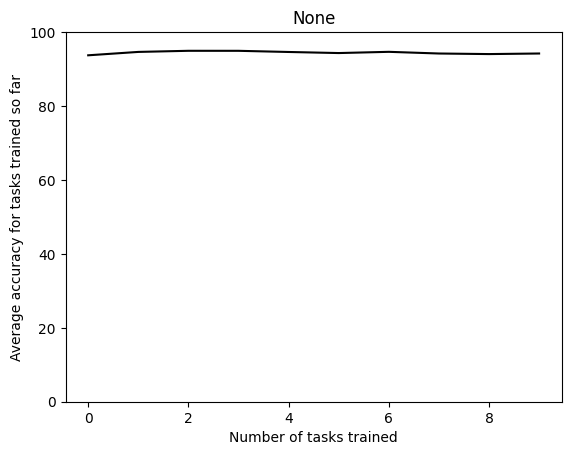

In [12]:
visualize_avg_acc_curve(test_accs_matrix)